# Model Evaluation

In [97]:
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, precision_score, accuracy_score, f1_score, recall_score,ConfusionMatrixDisplay,confusion_matrix, roc_curve,auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## importing variables and models

In [23]:
with open("project_variables/Xtrain.pickle",'rb') as file:
    comments = pickle.load(file)
with open("project_variables/models/GridLogistic.pickle",'rb') as file:
    GridLRModel = pickle.load(file)
with open("project_variables/models/LinearSVC.pickle",'rb') as file:
    SVCModel = pickle.load(file)
with open("project_variables/models/LogisticRegression.pickle",'rb') as file:
    LRModel = pickle.load(file)
with open("project_variables/models/MultinomialNB.pickle",'rb') as file:
    NBModel = pickle.load(file)
with open("project_variables/models/RandomLinearSVC.pickle",'rb') as file:
    RandSVCModel = pickle.load(file)
data = pd.read_csv("Toxic-Comment-Classification-Challenge-master/data/train.csv")
labels = data.iloc[:,2:]

In [26]:
##Splitting data
Xtrain,XTest,Ytrain,YTest = train_test_split(comments,labels,test_size=0.2,random_state=42)
Xtest,Xval,Ytest,Yval = train_test_split(XTest,YTest,test_size=0.5,random_state=42)

## Precision,Recall, Accuracy, and F1

![figure](https://miro.medium.com/v2/resize:fit:1400/1*pOtBHai4jFd-ujaNXPilRg.png)

In [32]:
models = [GridLRModel,SVCModel,LRModel,NBModel,RandSVCModel]
columns = list(labels.columns)
models,columns

([RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                     estimator=LinearSVC(),
                     param_distributions={'C': [1, 10, 20],
                                          'loss': ['hinge', 'squared_hinge'],
                                          'penalty': ['l1', 'l2']},
                     scoring='accuracy', verbose=True),
  LinearSVC(),
  LogisticRegression(),
  MultinomialNB(),
  GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
               estimator=LogisticRegression(),
               param_grid={'class_weight': [None, 'balanced'],
                           'solver': ['newton-cg', 'lbfgs', 'liblinear']},
               scoring='f1')],
 ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])

In [37]:
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
evaluation_table = []
for model in models:
    print(f"In {model.__class__.__name__.split('.')[-1]}....")
    for col in columns:
        model.fit(Xtrain,Ytrain[col])
        y_preds = model.predict(Xtest)
        name = model.__class__.__name__.split('.')[-1]
        f1 = f1_score(Ytest[col],y_preds)
        accuracy = accuracy_score(Ytest[col],y_preds)
        recall = recall_score(Ytest[col],y_preds)
        precision = precision_score(Ytest[col],y_preds)
        evaluation_table.append([name,col,accuracy,recall,precision,f1])
    print(f"Done...")

In RandomizedSearchCV....
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Done...
In LinearSVC....
Done...
In LogisticRegression....
Done...
In MultinomialNB....
Done...
In GridSearchCV....
Done...


In [42]:
Eval = pd.DataFrame(evaluation_table,columns=["Model","Criteria","accuracy","recall","precision","f1"])
Eval

,Model,Criteria,accuracy,recall,precision,f1
0,RandomizedSearchCV,toxic,0.960080,0.671224,0.886500,0.763987
1,RandomizedSearchCV,severe_toxic,0.990474,0.295597,0.540230,0.382114
2,RandomizedSearchCV,obscene,0.978129,0.690338,0.877219,0.772638
3,RandomizedSearchCV,threat,0.997493,0.135135,0.384615,0.200000
4,RandomizedSearchCV,insult,0.969606,0.573201,0.766169,0.655784
5,RandomizedSearchCV,identity_hate,0.991477,0.160256,0.833333,0.268817
6,LinearSVC,toxic,0.959516,0.695964,0.856571,0.767960
7,LinearSVC,severe_toxic,0.990474,0.295597,0.540230,0.382114
8,LinearSVC,obscene,0.978129,0.690338,0.877219,0.772638
9,LinearSVC,threat,0.997493,0.135135,0.384615,0.200000


## GridSearch Evaluation Visualization

In [119]:
chosen_model = Eval[Eval.Model=="GridSearchCV"]
chosen_model.index = columns
chosen_model

,Model,Criteria,accuracy,recall,precision,f1
toxic,GridSearchCV,toxic,0.934198,0.848958,0.614515,0.712958
severe_toxic,GridSearchCV,severe_toxic,0.973617,0.861635,0.255597,0.394245
obscene,GridSearchCV,obscene,0.967914,0.885914,0.647660,0.748279
threat,GridSearchCV,threat,0.990224,0.783784,0.163842,0.271028
insult,GridSearchCV,insult,0.952873,0.866005,0.520119,0.649907
identity_hate,GridSearchCV,identity_hate,0.971549,0.775641,0.224074,0.347701


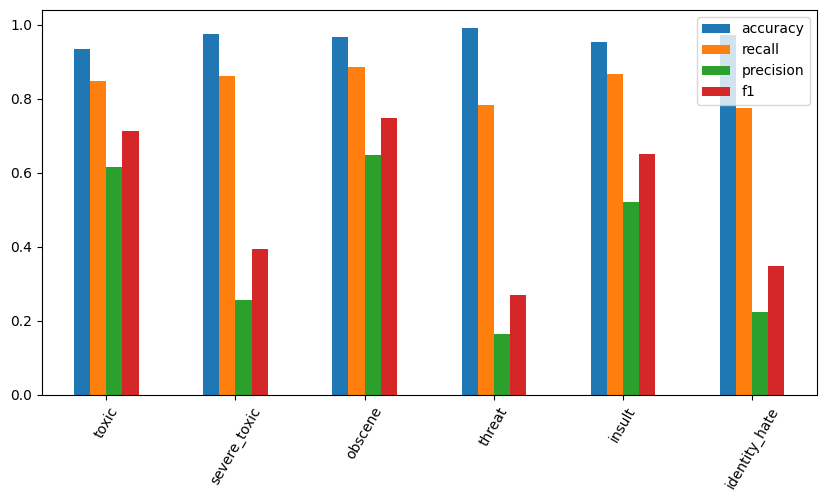

In [121]:
chosen_model.plot(figsize=(10,5),kind="bar",rot=60)
%matplotlib inline
plt.show()

## Confusion Matrix

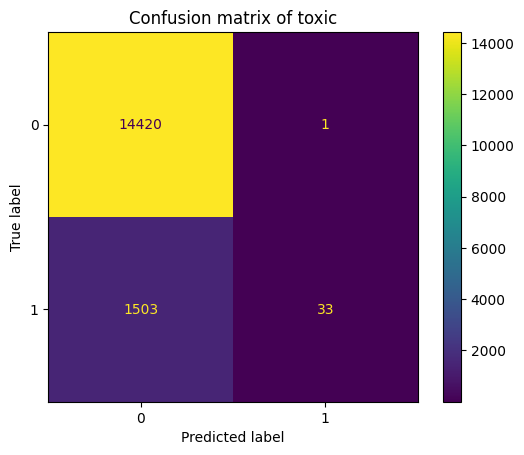

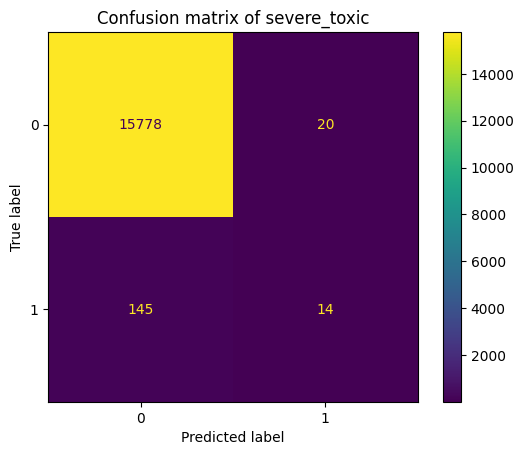

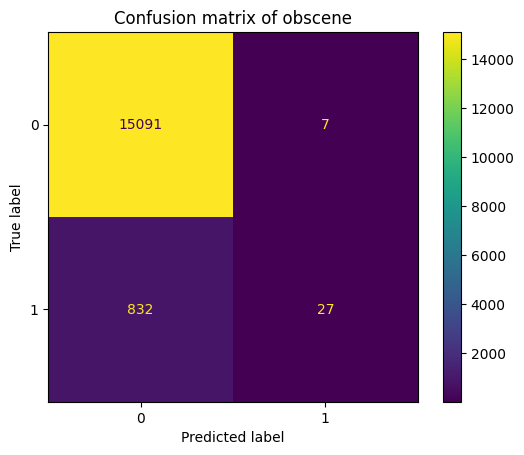

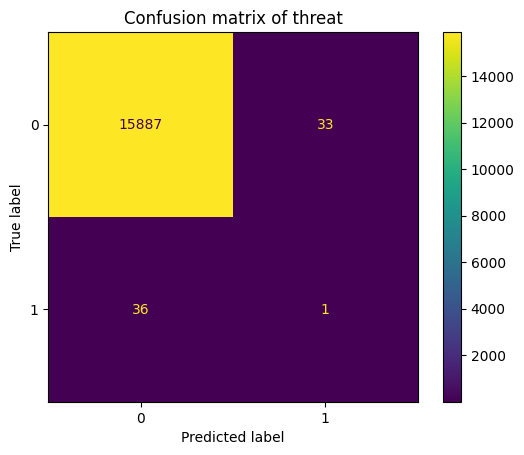

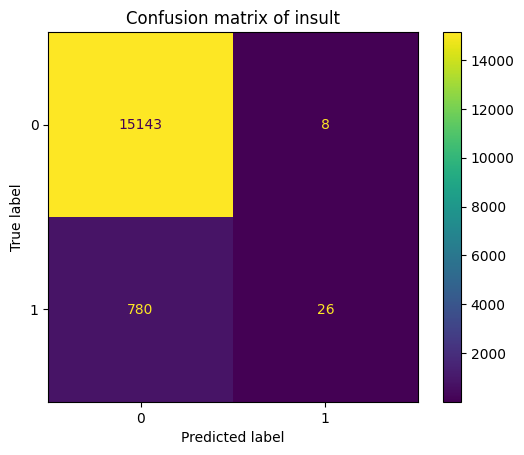

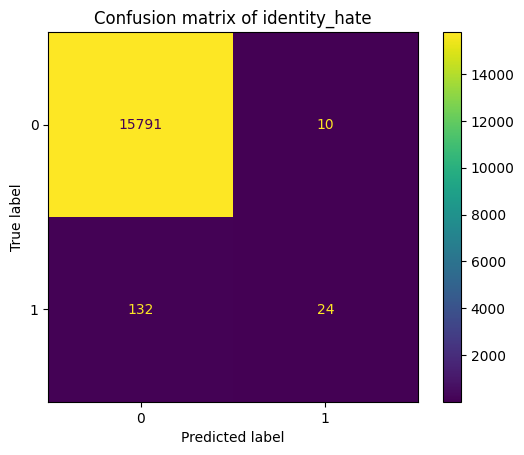

In [68]:
for col in columns:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.title(f'Confusion matrix of {col}')
    ConfusionMatrixDisplay.from_estimator(LRModel,Xtest,Ytest[col],ax=ax)

In [86]:
y_scores = LRModel.predict_proba(Xtest)[:,1]
fpr,tpr,thresholds = roc_curve(Ytest["toxic"],y_scores)

In [87]:
thresholds

array([           inf, 9.95602426e-01, 8.59923870e-01, ...,
       6.42041824e-05, 6.41450036e-05, 1.19702068e-05])

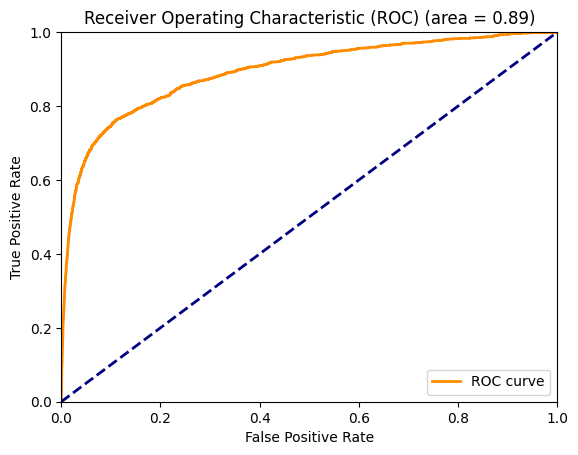

In [100]:
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

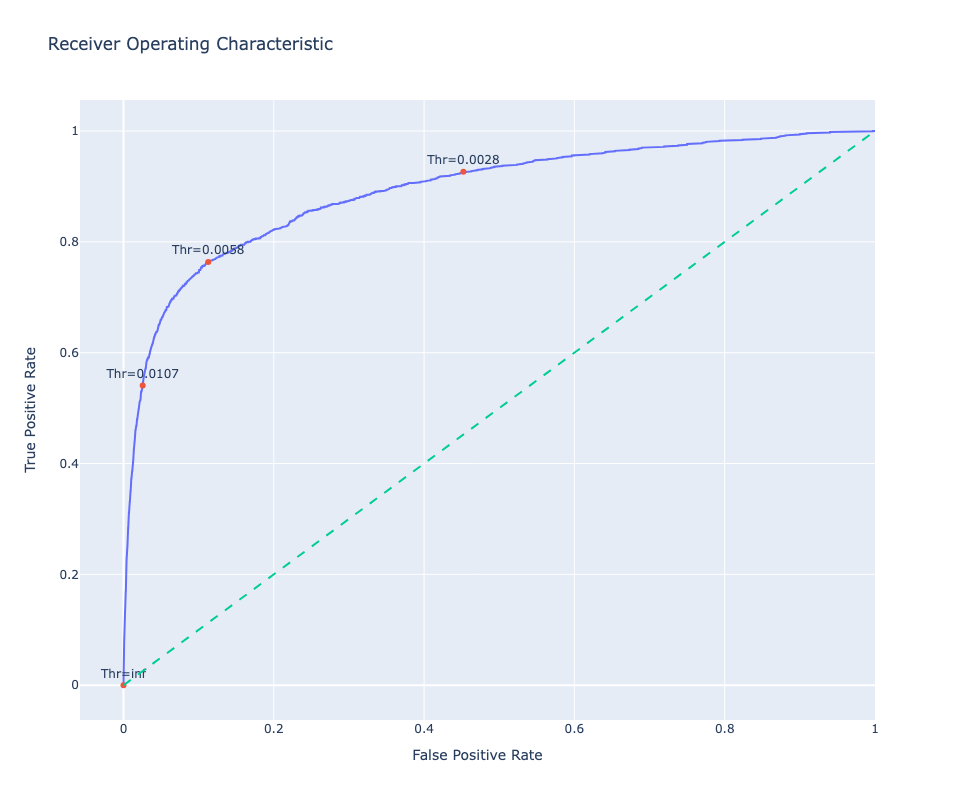

In [123]:
import plotly.graph_objects as go
# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name='ROC curve'
)

# Only label every nth point to avoid cluttering
n = 500  
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices], 
    y=tpr[indices], 
    mode='markers+text', 
    name='Threshold points', 
    text=[f"Thr={thr:.4f}" for thr in thresholds[indices]], 
    textposition='top center'
)


# Diagonal line
trace2 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=False
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()